## **Covid Test Cases Classification**

---





In [ ]:
#Connecting Google Drive to Google Colab to Access the Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing Libraries & Modules**

In [ ]:
#Importing Libraries & Modules
import numpy as np
#numpy is a library used to deal with complex mathematical operations on arrays/matrices
from matplotlib import pyplot as plt
#matplotlib is a library used for plotting in python
import os #used to deal with operating systems
import keras
#A deep Learning library
from keras.preprocessing import image
#A module from keras that helps in data preprocessing and image in particular helps in data augmentation
from keras.preprocessing.image import ImageDataGenerator
#A Module from image in keras that generates the data augmentation
from keras.models import *
#Importing All keras models to help in model selection
from keras.layers import *
#Importing All keras layers to help in model building

## **Dataset**

In [ ]:
#Rescaling Both Training and Test Data
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

**Change the paths to the paths of your dataset**

In [ ]:
#Sizing and Grouping Training and Test Data
train_dataset = train.flow_from_directory('/content/drive/MyDrive/dataset/train',
                                          target_size = (224, 224),
                                          batch_size = 10)

test_dataset = test.flow_from_directory('/content/drive/MyDrive/dataset/test',
                                          target_size= (224, 224),
                                          batch_size = 10 )

Found 67 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


In [ ]:
#Getting Available Class Labels in Training Data
train_dataset.class_indices

{'covid': 0, 'normal': 1}

## **Model Building Using VGG16 Network Architecture**

**Build the model using VGG16 Network:**

It has 4 blocks, each block has 1 Covolution layer and 1 MaxPooling layer.
- Number of filters in each Conv layer is **32, 64, 128, and 256** respectively. Each filter is **3x3** and the activation function is **ReLu**.
- MaxPooling layers has a **pool size of 2x2**.


The 4 blocks are followed by a Flattening layer and then a classifier block that consists of:
- Dense layer with **128 units** and **ReLu** activation function
- Dense layer with **64 units** and **ReLu** activation function
- Output layer with **the number of classes** and activation function **softmax**.

In [ ]:
'''There are two ways to build a convolutional neural network in python, either by creating the network as a stack using a list
or by defining the model type and adding layers afterwards, both ways are shown below'''

#First Way: Stacking Layers in a List
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1), activation = 'relu', padding = 'same', input_shape = (224, 224, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))


In [ ]:
#Second Way: Defining the Model and Adding Layers
#Note that you only need one of the two ways to build a model so either run this cell or the previous cell

#Selecting Model Type



## **Model Training**

**For the Model Training:**

- Set the optimizer to **adam**
- Set the loss function to the **binary crossentropy**
- Select **Accuracy** from metrics.

In [ ]:
#Model Training

#Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## **Fitting the Model to The Data**

**To fit the model:**
- Set number of epochs to** 10 or 15**
- Set the steps per epoch to **8**.


In [ ]:
#Fitting Model to Data and defining the Hyperparameters
model_fit = model.fit(train_dataset,
            steps_per_epoch = 4,
            epochs = 10,
            validation_data = test_dataset)

Epoch 1/10
4/4 [==============================] - 15s 4s/step - loss: 0.8767 - accuracy: 0.7500 - val_loss: 0.6037 - val_accuracy: 0.7407
Epoch 2/10
4/4 [==============================] - 5s 1s/step - loss: 0.6058 - accuracy: 0.7250 - val_loss: 0.5444 - val_accuracy: 0.7407
Epoch 3/10
4/4 [==============================] - 5s 1s/step - loss: 0.5380 - accuracy: 0.7297 - val_loss: 0.4452 - val_accuracy: 0.7407
Epoch 4/10
4/4 [==============================] - 5s 1s/step - loss: 0.4201 - accuracy: 0.7568 - val_loss: 0.2373 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 5s 1s/step - loss: 0.2575 - accuracy: 0.8919 - val_loss: 0.0515 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 5s 1s/step - loss: 0.2429 - accuracy: 0.9189 - val_loss: 0.0740 - val_accuracy: 0.9630
Epoch 7/10
4/4 [==============================] - 5s 1s/step - loss: 0.2186 - accuracy: 0.8919 - val_loss: 0.3501 - val_accuracy: 0.8148
Epoch 8/10
4/4 [========================

## **Results & Plots**

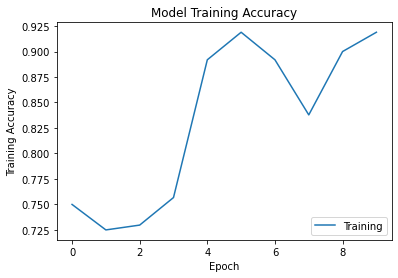

In [ ]:
#Training Accuracy Plot using Matplotlib

plt.plot(model_fit.history['accuracy']) #Defing the plot

#Adding Plot Title
plt.title('Model Training Accuracy')

#Adding Axes Labels
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')

#Defining & Locating Legend
plt.legend(['Training'], loc='lower right')

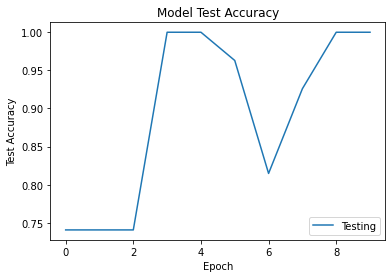

In [ ]:
#Validation Accuracy Plot using Matplotlib

plt.plot(model_fit.history['val_accuracy']) #Defing the plot

#Adding Plot Title
plt.title('Model Test Accuracy')

#Adding Axes Labels
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')

#Defining & Locating Legend
plt.legend(['Testing'], loc = 'lower right')

## **Evaluating Results**

In [ ]:
#Comparing Results with Actual Cases
#Defining two empty list to store the predicted cases and the actual cases
actual_cases = []
predicted_cases = []

#Looping over each case to compare between prediction and actual case

for i in os.listdir("/content/drive/MyDrive/Covid19-dataset/test/Normal/"):
  case = image.load_img("/content/drive/MyDrive/Covid19-dataset/test/Normal/" + i,target_size=(224,224))
  case = image.img_to_array(case)
  case = np.expand_dims(case,axis=0)
  prediction = (model.predict(case) > 0.5).astype("int32")
  predicted_cases.append(p[0,0])
  actual_cases.append(1)

for i in os.listdir("/content/drive/MyDrive/Covid19-dataset/test/Covid/"):
  case = image.load_img("/content/drive/MyDrive/Covid19-dataset/test/Covid/"+i,target_size=(224,224))
  case = image.img_to_array(case)
  case = np.expand_dims(case,axis=0)
  prediction = (model.predict(case)>0.5).astype("int32")
  predicted_cases.append(p[0,0])
  actual_cases.append(0)

for i in os.listdir("/content/drive/MyDrive/Covid19-dataset/test/Viral_Pneumonia/"):
  case = image.load_img("/content/drive/MyDrive/Covid19-dataset/test/Viral_Pneumonia/"+i,target_size=(224,224))
  case = image.img_to_array(case)
  case = np.expand_dims(case,axis=0)
  prediction = (model.predict(case)>0.5).astype("int32")
  predicted_cases.append(p[0,0])
  actual_cases.append(2)

In [ ]:
#Getting Numerical Results and Report
from sklearn.metrics import classification_report

print(classification_report(actual_cases, predicted_cases))


In [ ]:
#Converting The results into arrays
actual_cases = np.array(actual_cases)
predicted_cases = np.array(predicted_cases)

#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(actual_cases, predicted_cases)
sns.heatmap(cm,cmap="plasma",annot=True)